In [1]:
!pip install seaborn
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [33]:
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import classification_report
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [34]:
file_path = r"C:\Users\dell\Downloads\Medicinal Leaf Dataset\Medicinal Leaf Dataset\Segmented Medicinal Leaf Images"
name_class = os.listdir(file_path)
print(name_class)

['Alpinia Galanga (Rasna)', 'Amaranthus Viridis (Arive-Dantu)', 'Artocarpus Heterophyllus (Jackfruit)', 'Azadirachta Indica (Neem)', 'Basella Alba (Basale)', 'Brassica Juncea (Indian Mustard)', 'Carissa Carandas (Karanda)', 'Citrus Limon (Lemon)', 'Ficus Auriculata (Roxburgh fig)', 'Ficus Religiosa (Peepal Tree)', 'Hibiscus Rosa-sinensis', 'Jasminum (Jasmine)', 'Mangifera Indica (Mango)', 'Mentha (Mint)', 'Moringa Oleifera (Drumstick)', 'Muntingia Calabura (Jamaica Cherry-Gasagase)', 'Murraya Koenigii (Curry)', 'Nerium Oleander (Oleander)', 'Nyctanthes Arbor-tristis (Parijata)', 'Ocimum Tenuiflorum (Tulsi)', 'Piper Betle (Betel)', 'Plectranthus Amboinicus (Mexican Mint)', 'Pongamia Pinnata (Indian Beech)', 'Psidium Guajava (Guava)', 'Punica Granatum (Pomegranate)', 'Santalum Album (Sandalwood)', 'Syzygium Cumini (Jamun)', 'Syzygium Jambos (Rose Apple)', 'Tabernaemontana Divaricata (Crape Jasmine)', 'Trigonella Foenum-graecum (Fenugreek)']


In [35]:
filepaths = list(glob.glob(file_path+'/**/*.*'))
print(filepaths)

['C:\\Users\\dell\\Downloads\\Medicinal Leaf Dataset\\Medicinal Leaf Dataset\\Segmented Medicinal Leaf Images\\Alpinia Galanga (Rasna)\\AG-S-001.jpg', 'C:\\Users\\dell\\Downloads\\Medicinal Leaf Dataset\\Medicinal Leaf Dataset\\Segmented Medicinal Leaf Images\\Alpinia Galanga (Rasna)\\AG-S-002.jpg', 'C:\\Users\\dell\\Downloads\\Medicinal Leaf Dataset\\Medicinal Leaf Dataset\\Segmented Medicinal Leaf Images\\Alpinia Galanga (Rasna)\\AG-S-003.jpg', 'C:\\Users\\dell\\Downloads\\Medicinal Leaf Dataset\\Medicinal Leaf Dataset\\Segmented Medicinal Leaf Images\\Alpinia Galanga (Rasna)\\AG-S-004.jpg', 'C:\\Users\\dell\\Downloads\\Medicinal Leaf Dataset\\Medicinal Leaf Dataset\\Segmented Medicinal Leaf Images\\Alpinia Galanga (Rasna)\\AG-S-005.jpg', 'C:\\Users\\dell\\Downloads\\Medicinal Leaf Dataset\\Medicinal Leaf Dataset\\Segmented Medicinal Leaf Images\\Alpinia Galanga (Rasna)\\AG-S-006.jpg', 'C:\\Users\\dell\\Downloads\\Medicinal Leaf Dataset\\Medicinal Leaf Dataset\\Segmented Medicinal Le

In [36]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
print(labels)


['Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 

In [37]:
filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)

Text(0.5, 0, 'Type')

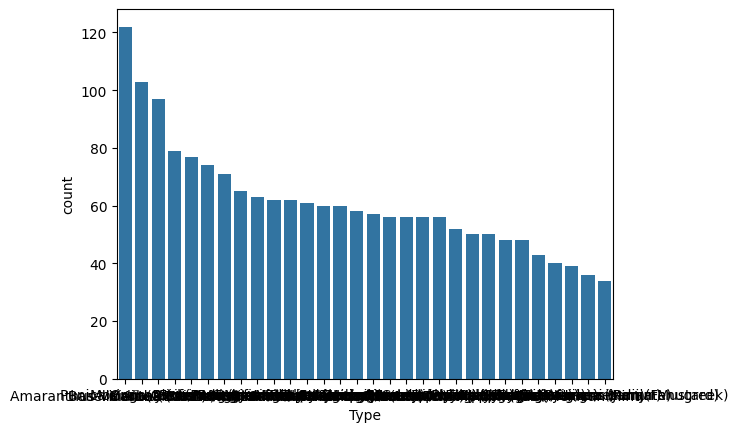

In [38]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')

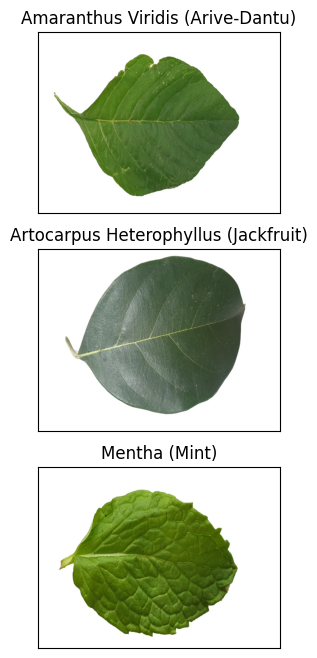

In [39]:
train, test = train_test_split(data, test_size=0.25, random_state=42)
fig, axes = plt.subplots(nrows=3, figsize=(10,8), subplot_kw={'xticks':[],'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])

In [40]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [41]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)

import json

# Save class indices to a file after training
with open('class_indices.json', 'w') as f:
    json.dump(train_gen.class_indices, f)


Found 1376 validated image filenames belonging to 30 classes.


In [42]:
valid_gen = train_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)

Found 459 validated image filenames belonging to 30 classes.


In [43]:
test_gen = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)

Found 459 validated image filenames belonging to 30 classes.


In [44]:
pretrained_model = ResNet50(
    input_shape=(100,100,3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
# Unfreeze the last 5 layers to allow them to be trained
for layer in pretrained_model.layers[-5:]:  # Adjust this number as needed
    layer.trainable = True

In [45]:
inputs = pretrained_model.input

In [46]:
x = Dense(128, activation='relu')(pretrained_model.output)
x = Dense(128, activation='relu')(x)
outputs = Dense(30, activation='softmax')(x)             #Important!
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

In [47]:
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=3
)

C:\Users\dell\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
43/43 ━━━━━━━━━━━━━━━━━━━━ 239s 4s/step - accuracy: 0.3274 - loss: 2.6586 - val_accuracy: 0.5730 - val_loss: 1.5072
Epoch 2/3
43/43 ━━━━━━━━━━━━━━━━━━━━ 145s 3s/step - accuracy: 0.9461 - loss: 0.3146 - val_accuracy: 0.8388 - val_loss: 0.6801
Epoch 3/3
43/43 ━━━━━━━━━━━━━━━━━━━━ 147s 3s/step - accuracy: 0.9908 - loss: 0.0549 - val_accuracy: 0.9325 - val_loss: 0.2574


In [48]:
model.save("model_resnet.h5")

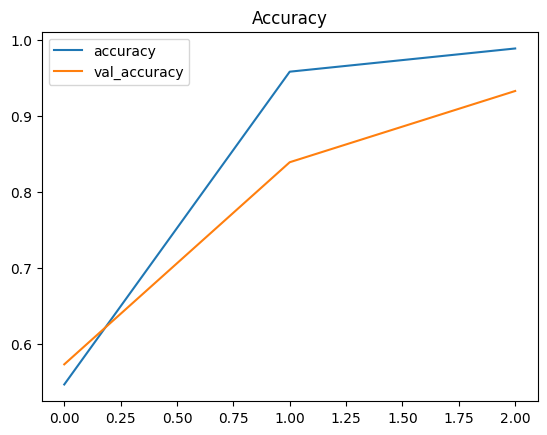

In [49]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

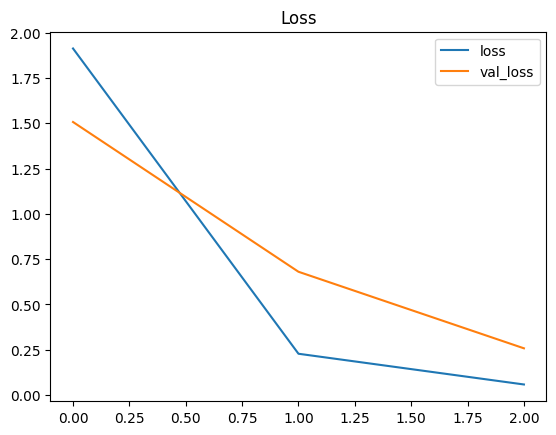

In [52]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [53]:
results = model.evaluate(test_gen, verbose=0)
print("Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

Test Loss: 0.25741
Test Accuracy: 93.25%


In [21]:
pred = model.predict(test_gen)
pred = np.argmax(pred, axis=1)
labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]
y_test = list(test.Label)

15/15 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step


In [22]:
import tensorflow as tf
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
])

In [23]:
input_shape=(100,100,3),
n_classes=30

In [24]:
chanDim = -1
if K.image_data_format() == "channels_first":
    input_shape = (CHANNELS, IMAGE_SIZE, IMAGE_SIZE)
    batch_input_shape = (BATCH_SIZE, CHANNELS, IMAGE_SIZE, IMAGE_SIZE)
    chanDim = 1

In [38]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(100, 100, 3)),
    data_augmentation,
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5), 
    layers.Dense(n_classes, activation='softmax'),
])

In [39]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 2, 2, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 30)                  │           3,870 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,834,718 (7.00 MB)

 Trainable params: 1,834,718 (7.00 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
history = model.fit(
    train_gen,
    batch_size=32,
    validation_data=valid_gen,
    verbose=1,
    epochs=50,
)

Epoch 1/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 27s 585ms/step - accuracy: 0.0267 - loss: 5.5170 - val_accuracy: 0.0370 - val_loss: 3.2950
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 23s 531ms/step - accuracy: 0.0614 - loss: 3.3576 - val_accuracy: 0.1046 - val_loss: 3.2297
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 23s 541ms/step - accuracy: 0.0711 - loss: 3.3092 - val_accuracy: 0.0566 - val_loss: 3.2099
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 22s 514ms/step - accuracy: 0.0543 - loss: 3.3367 - val_accuracy: 0.0806 - val_loss: 3.2430
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 22s 512ms/step - accuracy: 0.0774 - loss: 3.3269 - val_accuracy: 0.1220 - val_loss: 3.1363
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 21s 498ms/step - accuracy: 0.0942 - loss: 3.2193 - val_accuracy: 0.1046 - val_loss: 3.1546
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 23s 531ms/step - accuracy: 0.0949 - loss: 3.2274 - val_accuracy: 0.1612 - val_loss: 3.0660
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 23s 544ms/step - accuracy: 0.1159 - loss: 3.1504 - 

In [42]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(test_gen)
print(f"Test Accuracy: {round(scores[1],4)*100}%")

[INFO] Calculating model accuracy
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 316ms/step - accuracy: 0.5180 - loss: 3.0933
Test Accuracy: 50.33%


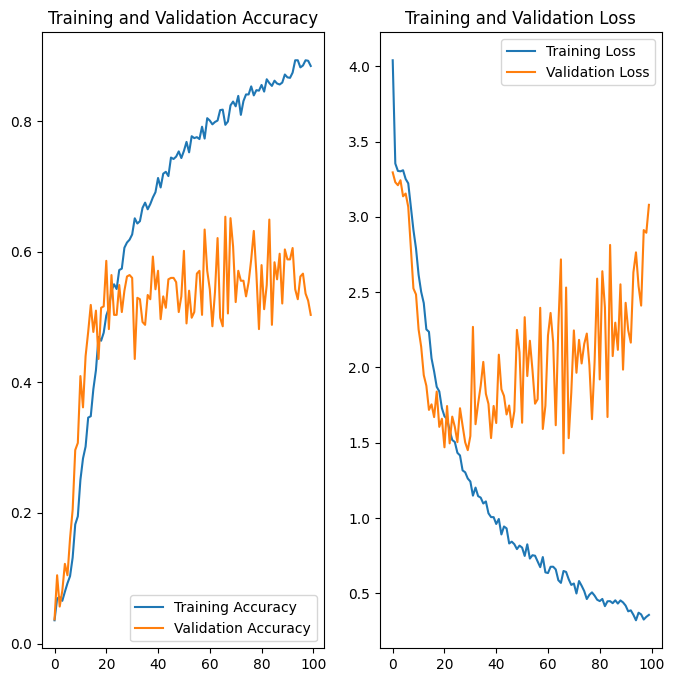

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [45]:

model.save("model_cnn.h5")

In [29]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Predicted class: Ocimum Tenuiflorum (Tulsi) with confidence: 99.30%


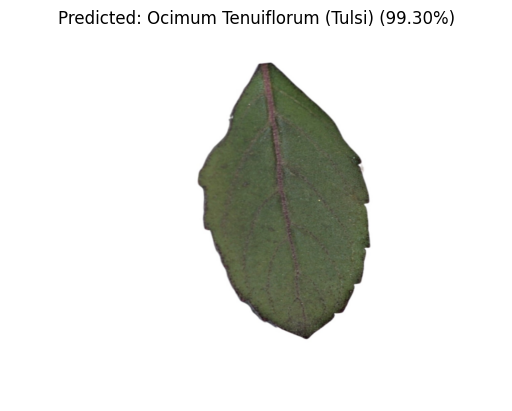

In [54]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
import json

# Load the ResNet model
model = load_model("model_resnet.h5")

# Load class indices (replace this with the path to your class indices file)
with open('class_indices.json', 'r') as f:
    class_indices = json.load(f)

# Reverse the dictionary to get labels from indices
labels = {v: k for k, v in class_indices.items()}

# Function to preprocess the image
def load_and_preprocess_image(img_path):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(100, 100))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Function to predict image
def predict_image(img_path, labels):
    # Preprocess the image
    img_array = load_and_preprocess_image(img_path)

    # Make the prediction
    pred = model.predict(img_array)

    # Get the index of the predicted class
    pred_class_index = np.argmax(pred, axis=1)[0]

    # Get the predicted class label
    predicted_class = labels[pred_class_index]
    
    # Get the confidence score
    confidence = np.max(pred) * 100
    
    return predicted_class, confidence

# Example usage
new_image_path = r"C:\testing\OT-S-025.jpg"  # Replace with the path to your image
predicted_label, confidence = predict_image(new_image_path, labels)

# Display the result
print(f"Predicted class: {predicted_label} with confidence: {confidence:.2f}%")

# Optional: Display the image with the predicted label
img = image.load_img(new_image_path)
plt.imshow(img)
plt.title(f"Predicted: {predicted_label} ({confidence:.2f}%)")
plt.axis('off')
plt.show()


In [58]:
print(train.head())  # View the first few entries of the training data




                                               Filepath  \
1719  C:\Users\dell\Downloads\Medicinal Leaf Dataset...   
464   C:\Users\dell\Downloads\Medicinal Leaf Dataset...   
988   C:\Users\dell\Downloads\Medicinal Leaf Dataset...   
1118  C:\Users\dell\Downloads\Medicinal Leaf Dataset...   
1383  C:\Users\dell\Downloads\Medicinal Leaf Dataset...   

                                    Label  
1719  Nyctanthes Arbor-tristis (Parijata)  
464            Ocimum Tenuiflorum (Tulsi)  
988            Ocimum Tenuiflorum (Tulsi)  
1118           Nerium Oleander (Oleander)  
1383        Punica Granatum (Pomegranate)  


In [59]:
print(test.head())  # View the first few entries of the test data


                                               Filepath  \
643   C:\Users\dell\Downloads\Medicinal Leaf Dataset...   
332   C:\Users\dell\Downloads\Medicinal Leaf Dataset...   
990   C:\Users\dell\Downloads\Medicinal Leaf Dataset...   
538   C:\Users\dell\Downloads\Medicinal Leaf Dataset...   
1811  C:\Users\dell\Downloads\Medicinal Leaf Dataset...   

                                 Label  
643                      Mentha (Mint)  
332              Basella Alba (Basale)  
990   Brassica Juncea (Indian Mustard)  
538   Brassica Juncea (Indian Mustard)  
1811       Santalum Album (Sandalwood)  


In [56]:
# Get a batch of training images and labels
train_images, train_labels = next(train_gen)
print(train_images.shape)  # E.g., (32, 100, 100, 3) if batch_size=32
print(train_labels.shape)  # E.g., (32, 30) if there are 30 classes


(32, 100, 100, 3)
(32, 30)


In [57]:
# Get a batch of test images and labels
test_images, test_labels = next(test_gen)
print(test_images.shape)  # E.g., (32, 100, 100, 3)
print(test_labels.shape)  # E.g., (32, 30)


(32, 100, 100, 3)
(32, 30)
